# Problem Statement

Your client is an Insurance company and they need your help in building a model to predict whether the policyholder (customer) will pay next premium on time or not.

 

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that you pay regularly to an insurance company for this guarantee.

 

For example, you may pay a premium of Rs. 5000 each year for a medical insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

 

Just like medical insurance, there is life insurance where every year you pay a premium of certain amount to insurance provider company so that in case of unfortunate event of your death, the insurance provider company will provide a compensation (called ‘sum assured’) to your immediate family. Similarly, there can be a variety of insurance products for different kinds of risks.

 

As you can imagine, if a large number of customers do not pay the premium on time, it might disrupt the cash flow and smooth operation for the company. A customer may stop making regular premium payments for a variety of reasons - some may forget, some may find it expensive and not worth the value, some may not have money to pay the premium etc.

 

Building a model to predict whether a customer would make the premium payment can be extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers who are less likely to pay and convince them to continue making timely payment.

 

Now, in order to predict, whether the customer would pay the next premium or not, you have information about past premium payment history for the policyholders along with their demographics (age, monthly income, area type) and sourcing channel etc.

# Hypothesis Generation

Below are some of the factors which I think can affect the target (dependent variable for this premium-paying prediction problem):
    1. Applicants with highest precentage of paying a premium should have more chances to pay in time.
    2. Applicants who's age is not too old may have more probability to pay in time.
    3. Applicants with high income should have more chances of paying a premium.
    4. Applicants who resides in Urban, higher chances of paying a premium.
    5. Applicants with pay premium on time several times, higher chances.

# Loading of data and importing the libraries and packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

    Making a copy of train and test data 

In [4]:
train_original = train.copy()
test_original = test.copy()

# Understanding the data

In [5]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,premium,target
0,110936,0.429,12058,355060,0.0,0.0,0.0,99.02,13,C,Urban,3300,1
1,41492,0.010,21546,315150,0.0,0.0,0.0,99.89,21,A,Urban,18000,1
2,31300,0.917,17531,84140,2.0,3.0,1.0,98.69,7,C,Rural,3300,0
3,19415,0.049,15341,250510,0.0,0.0,0.0,99.57,9,A,Urban,9600,1
4,99379,0.052,31400,198680,0.0,0.0,0.0,99.87,12,B,Urban,9600,1


In [6]:
test.head()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type
0,649,0.001,27384,51150,0.0,0.0,0.0,99.89,7,A,Rural
1,81136,0.124,23735,285140,0.0,0.0,0.0,98.93,19,A,Urban
2,70762,1.000,17170,186030,0.0,0.0,0.0,NaN,2,B,Urban
3,53935,0.198,16068,123540,0.0,0.0,0.0,99.00,11,B,Rural
4,15476,0.041,10591,200020,1.0,0.0,0.0,99.17,14,A,Rural


In [7]:
test.shape, train.shape

((34224, 11), (79853, 13))

    Dropping premium column

In [8]:
train = train.drop('premium', 1)
train_original = train_original.drop('premium', 1)

In [9]:
train.dtypes

id                                    int64
perc_premium_paid_by_cash_credit    float64
age_in_days                           int64
Income                                int64
Count_3-6_months_late               float64
Count_6-12_months_late              float64
Count_more_than_12_months_late      float64
application_underwriting_score      float64
no_of_premiums_paid                   int64
sourcing_channel                     object
residence_area_type                  object
target                                int64
dtype: object

In [10]:
train.describe()

,id,perc_premium_paid_by_cash_credit,age_in_days,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,target
count,79853.000000,79853.000000,79853.000000,7.985300e+04,79756.000000,79756.000000,79756.000000,76879.000000,79853.000000,79853.000000
mean,57167.166368,0.314288,18846.696906,2.088472e+05,0.248671,0.078188,0.060008,99.067291,10.863887,0.937410
std,32928.970160,0.334915,5208.719136,4.965826e+05,0.691468,0.436507,0.312023,0.739799,5.170687,0.242226
min,2.000000,0.000000,7670.000000,2.403000e+04,0.000000,0.000000,0.000000,91.900000,2.000000,0.000000
25%,28640.000000,0.034000,14974.000000,1.080100e+05,0.000000,0.000000,0.000000,98.810000,7.000000,1.000000
50%,57262.000000,0.167000,18625.000000,1.665600e+05,0.000000,0.000000,0.000000,99.210000,10.000000,1.000000
75%,85632.000000,0.538000,22636.000000,2.520900e+05,0.000000,0.000000,0.000000,99.540000,14.000000,1.000000
max,114076.000000,1.000000,37602.000000,9.026260e+07,13.000000,17.000000,11.000000,99.890000,60.000000,1.000000


In [11]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_days                            0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

# Univariate Analysis

    Continuous Data Object

# no_of_premiums_paid column

In [12]:
train['no_of_premiums_paid'].describe()

count    79853.000000
mean        10.863887
std          5.170687
min          2.000000
25%          7.000000
50%         10.000000
75%         14.000000
max         60.000000
Name: no_of_premiums_paid, dtype: float64

    Detecting outliers using IQR Method

In [13]:
Q1_premiumpaid_train = train['no_of_premiums_paid'].quantile(0.25)
Q3_premiumpaid_train = train['no_of_premiums_paid'].quantile(0.75)
IQR_premiumpaid_train = Q3_premiumpaid_train  - Q1_premiumpaid_train 
upper_premiumpaid_train = Q3_premiumpaid_train + 1.5 * IQR_premiumpaid_train
lower_premiumpaid_train = Q1_premiumpaid_train - 1.5 * IQR_premiumpaid_train
upper_premiumpaid_train, lower_premiumpaid_train

(24.5, -3.5)

In [14]:
Q1_premiumpaid_test = test['no_of_premiums_paid'].quantile(0.25)
Q3_premiumpaid_test = test['no_of_premiums_paid'].quantile(0.75)
IQR_premiumpaid_test = Q3_premiumpaid_test - Q1_premiumpaid_test 
upper_premiumpaid_test = Q3_premiumpaid_test + 1.5 * IQR_premiumpaid_test
lower_premiumpaid_test = Q1_premiumpaid_test - 1.5 * IQR_premiumpaid_test
upper_premiumpaid_test, lower_premiumpaid_test

(24.5, -3.5)

In [15]:
print(train[train['no_of_premiums_paid'] < -3.5]['no_of_premiums_paid'].count())
print(train[train['no_of_premiums_paid'] > 24.5]['no_of_premiums_paid'].count())
print(test[test['no_of_premiums_paid'] < -3.5]['no_of_premiums_paid'].count())
print(test[test['no_of_premiums_paid'] > 24.5]['no_of_premiums_paid'].count())

0
1426
0
658


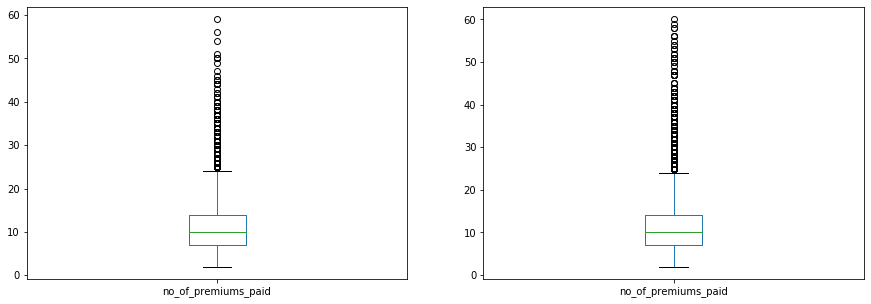

In [16]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['no_of_premiums_paid'].plot.box(ax=axarr[0])
train['no_of_premiums_paid'].plot.box(ax=axarr[1])

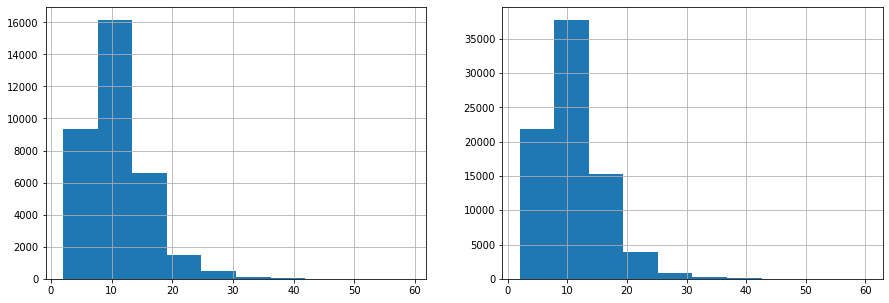

In [17]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['no_of_premiums_paid'].hist(ax=axarr[0])
train['no_of_premiums_paid'].hist(ax=axarr[1])

train.loc[train['no_of_premiums_paid'] > upper_premiumpaid_train ,'no_of_premiums_paid'] = np.mean(train['no_of_premiums_paid'])
train.loc[train['no_of_premiums_paid'] < lower_premiumpaid_train ,'no_of_premiums_paid'] = np.mean(train['no_of_premiums_paid'])
train['no_of_premiums_paid'].plot.box()

test.loc[test['no_of_premiums_paid'] > upper_premiumpaid_test,'no_of_premiums_paid'] = np.mean(test['no_of_premiums_paid'])
test.loc[test['no_of_premiums_paid'] < lower_premiumpaid_test,'no_of_premiums_paid'] = np.mean(test['no_of_premiums_paid'])
test['no_of_premiums_paid'].plot.box()

# application_underwriting_score column

    Checking whether application_underwriting_score lies below 90

In [18]:
test[test['application_underwriting_score']<90].shape[0] == 0,train[train['application_underwriting_score']<90].shape[0] == 0

(True, True)

In [19]:
train['application_underwriting_score'].mode()[0]

99.89

In [20]:
train['application_underwriting_score'].describe()

count    76879.000000
mean        99.067291
std          0.739799
min         91.900000
25%         98.810000
50%         99.210000
75%         99.540000
max         99.890000
Name: application_underwriting_score, dtype: float64

    Detecting outliers using IQR Method

In [21]:
Q1_application_train = train['application_underwriting_score'].quantile(0.25)
Q3_application_train = train['application_underwriting_score'].quantile(0.75)
IQR_application_train = Q3_application_train  - Q1_application_train 
upper_application_train = Q3_application_train + 1.5 * IQR_application_train
lower_application_train = Q1_application_train - 1.5 * IQR_application_train
upper_application_train, lower_application_train

(100.63500000000002, 97.715)

In [22]:
Q1_application_test = test['application_underwriting_score'].quantile(0.25)
Q3_application_test = test['application_underwriting_score'].quantile(0.75)
IQR_application_test = Q3_application_test - Q1_application_test 
upper_application_test = Q3_application_test + 1.5 * IQR_application_test
lower_application_test = Q1_application_test - 1.5 * IQR_application_test
upper_application_test, lower_application_test

(100.625, 97.70499999999998)

In [23]:
print(train[train['application_underwriting_score'] < lower_application_train]['application_underwriting_score'].count())
print(train[train['application_underwriting_score'] > upper_application_train]['application_underwriting_score'].count())
print(test[test['application_underwriting_score'] < lower_application_test]['application_underwriting_score'].count())
print(test[test['application_underwriting_score'] > upper_application_test]['application_underwriting_score'].count())

3381
0
1472
0


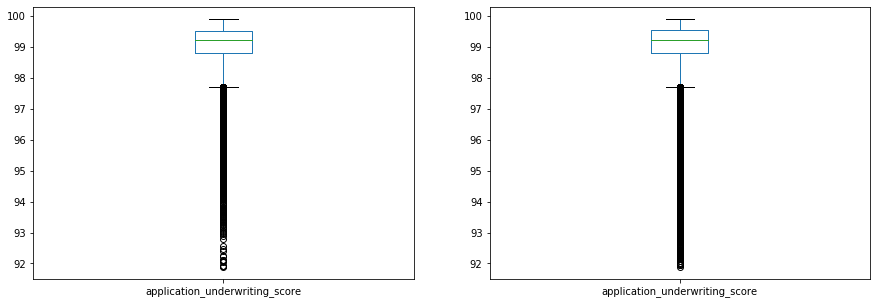

In [24]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['application_underwriting_score'].plot.box(ax=axarr[0])
train['application_underwriting_score'].plot.box(ax=axarr[1])

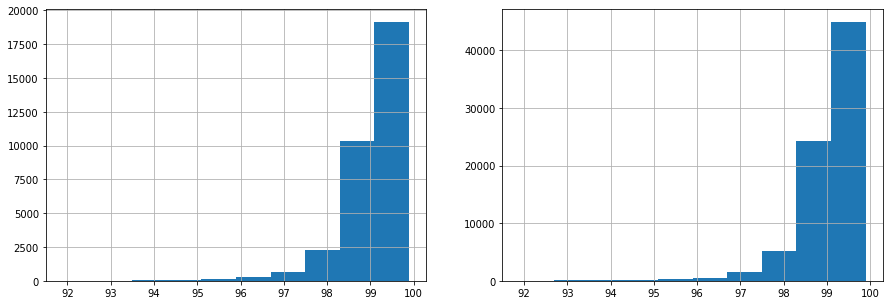

In [25]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['application_underwriting_score'].hist(ax=axarr[0])
train['application_underwriting_score'].hist(ax=axarr[1])

train.loc[train['application_underwriting_score'] > upper_application_train,'application_underwriting_score'] = np.mean(train['application_underwriting_score'])
train.loc[train['application_underwriting_score'] < lower_application_train,'application_underwriting_score'] = np.mean(train['application_underwriting_score'])
train['application_underwriting_score'].plot.box()

test.loc[test['application_underwriting_score'] > upper_application_test,'application_underwriting_score'] = np.mean(test['application_underwriting_score'])
test.loc[test['application_underwriting_score'] < lower_application_test,'application_underwriting_score'] = np.mean(test['application_underwriting_score'])
test['application_underwriting_score'].plot.box()

# Income column

In [26]:
train['Income'].describe()

count    7.985300e+04
mean     2.088472e+05
std      4.965826e+05
min      2.403000e+04
25%      1.080100e+05
50%      1.665600e+05
75%      2.520900e+05
max      9.026260e+07
Name: Income, dtype: float64

    Detecting outliers using IQR Method

In [27]:
Q1_Income_train = train['Income'].quantile(0.25)
Q3_Income_train = train['Income'].quantile(0.75)
IQR_Income_train = Q3_Income_train  - Q1_Income_train 
upper_Income_train = Q3_Income_train + 1.5 * IQR_Income_train
lower_Income_train = Q1_Income_train - 1.5 * IQR_Income_train
upper_Income_train, lower_Income_train

(468210.0, -108110.0)

In [28]:
Q1_Income_test = test['Income'].quantile(0.25)
Q3_Income_test = test['Income'].quantile(0.75)
IQR_Income_test = Q3_Income_test - Q1_Income_test 
upper_Income_test = Q3_Income_test + 1.5 * IQR_Income_test
lower_Income_test = Q1_Income_test - 1.5 * IQR_Income_test
upper_Income_test, lower_Income_test

(465453.75, -109036.25)

In [29]:
print(train[train['Income'] < lower_Income_train]['Income'].count())
print(train[train['Income'] > upper_Income_train]['Income'].count())
print(test[test['Income'] < lower_Income_test]['Income'].count())
print(test[test['Income'] > upper_Income_test]['Income'].count())

0
3428
0
1337


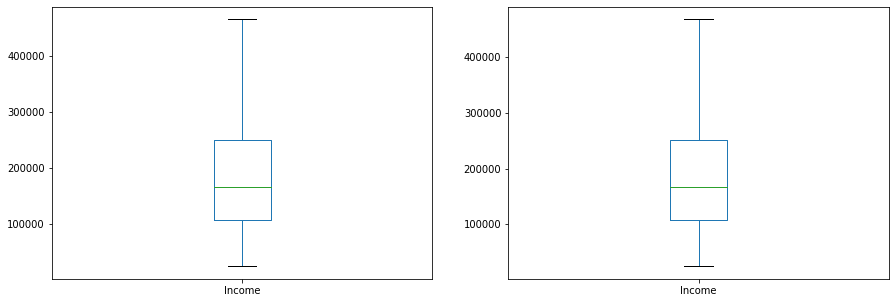

In [30]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['Income'].plot.box(ax=axarr[0],showfliers=False)
train['Income'].plot.box(ax=axarr[1],showfliers=False)

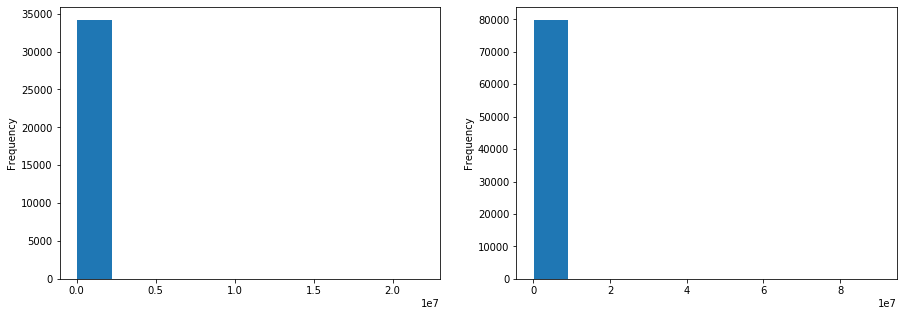

In [31]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['Income'].plot.hist(ax=axarr[0])
train['Income'].plot.hist(ax=axarr[1])

In [32]:
train['Income'].min(), train['Income'].max()

(24030, 90262600)

train.loc[train['Income'] > upper_Income_train,'Income'] = np.mean(train['Income'])
train.loc[train['Income'] < lower_Income_train,'Income'] = np.mean(train['Income'])
train['Income'].plot.box()

test.loc[test['Income'] > upper_Income_test,'Income'] = np.mean(test['Income'])
test.loc[test['Income'] < lower_Income_test,'Income'] = np.mean(test['Income'])
test['Income'].plot.box()

# age_in_days column

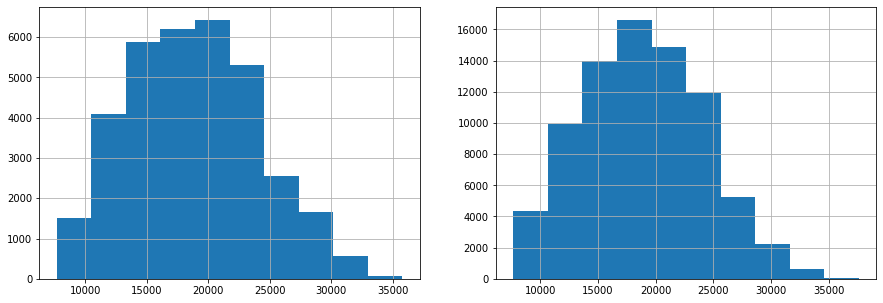

In [33]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['age_in_days'].hist(ax=axarr[0])
train['age_in_days'].hist(ax=axarr[1])

In [34]:
test['age_in_days'] = (test['age_in_days']/365).astype(int)
train['age_in_days'] = (train['age_in_days']/365).astype(int)

    Renaming a column as age in days converted into years

In [35]:
train = train.rename(columns={"age_in_days": "age_in_years"})
test = test.rename(columns={"age_in_days": "age_in_years"})

In [36]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_years', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

    Detecting outliers using IQR Method

In [37]:
Q1_age_train = train['age_in_years'].quantile(0.25)
Q3_age_train = train['age_in_years'].quantile(0.75)
IQR_age_train = Q3_age_train  - Q1_age_train 
upper_age_train = Q3_age_train + 1.5 * IQR_age_train
lower_age_train = Q1_age_train - 1.5 * IQR_age_train
upper_age_train, lower_age_train

(93.5, 9.5)

In [38]:
Q1_age_test = test['age_in_years'].quantile(0.25)
Q3_age_test = test['age_in_years'].quantile(0.75)
IQR_age_test = Q3_age_test - Q1_age_test 
upper_age_test = Q3_age_test + 1.5 * IQR_age_test
lower_age_test = Q1_age_test - 1.5 * IQR_age_test
upper_age_test, lower_age_test

(93.5, 9.5)

In [39]:
print(train[train['age_in_years'] < lower_age_train]['age_in_years'].count())
print(train[train['age_in_years'] > upper_age_train]['age_in_years'].count())
print(test[test['age_in_years'] < lower_age_test]['age_in_years'].count())
print(test[test['age_in_years'] > upper_age_test]['age_in_years'].count())

0
44
0
18


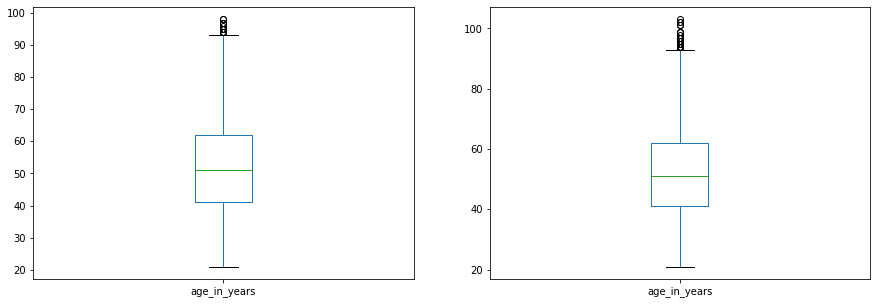

In [40]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['age_in_years'].plot.box(ax=axarr[0])
train['age_in_years'].plot.box(ax=axarr[1])

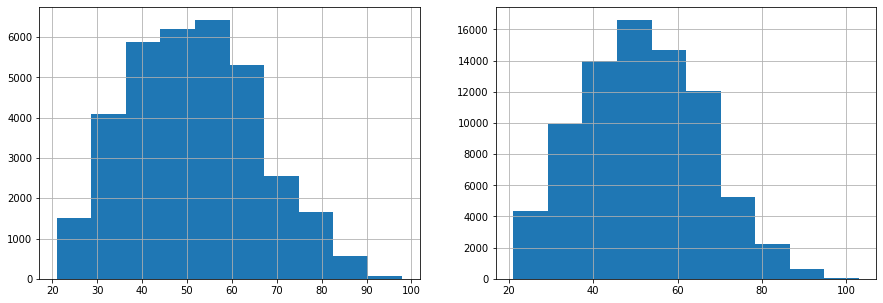

In [41]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['age_in_years'].hist(ax=axarr[0])
train['age_in_years'].hist(ax=axarr[1])

train.loc[train['age_in_days'] > upper_age_train,'age_in_days'] = np.mean(train['age_in_days'])
train.loc[train['age_in_days'] < lower_age_train,'age_in_days'] = np.mean(train['age_in_days'])
train['age_in_days'].plot.box()

test.loc[test['age_in_days'] > upper_age_test,'age_in_days'] = np.mean(test['age_in_days'])
test.loc[test['age_in_days'] < lower_age_test,'age_in_days'] = np.mean(test['age_in_days'])
test['age_in_days'].plot.box()

# perc_premium_paid_by_cash_credit column

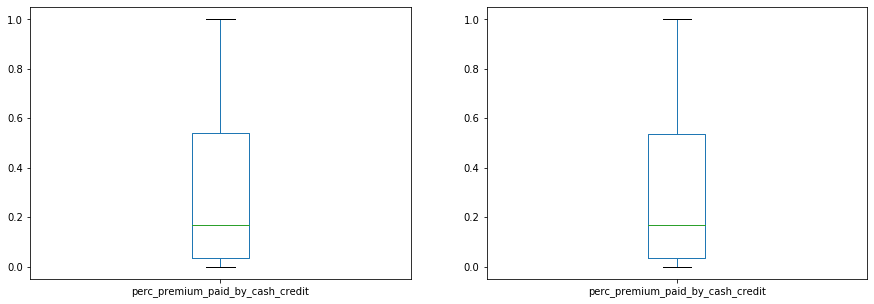

In [42]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['perc_premium_paid_by_cash_credit'].plot.box(ax=axarr[0])
train['perc_premium_paid_by_cash_credit'].plot.box(ax=axarr[1])

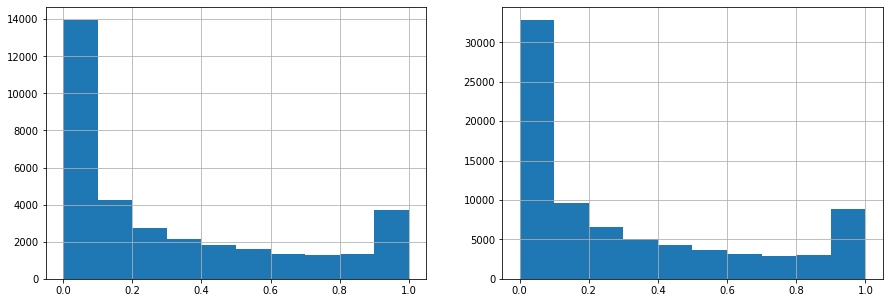

In [43]:
fig, axarr = plt.subplots(1,2, figsize=(15, 5))
test['perc_premium_paid_by_cash_credit'].hist(ax=axarr[0])
train['perc_premium_paid_by_cash_credit'].hist(ax=axarr[1])

# Count_3-6_months_late column

# Count_6-12_months_late column

# Count_more_than_12_months_late column

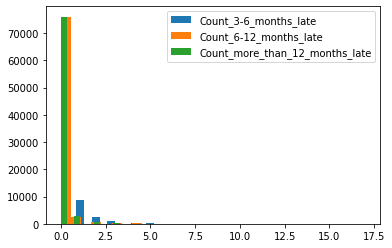

In [44]:
plt.hist(train['Count_3-6_months_late'], bins=30, label="Count_3-6_months_late")
plt.hist(train['Count_6-12_months_late'], bins=30, label="Count_6-12_months_late")
plt.hist(train['Count_more_than_12_months_late'], bins=30, label="Count_more_than_12_months_late")
plt.legend()
plt.show()

In [45]:
train['Count_more_than_12_months_late'].value_counts()

0.0     76038
1.0      2996
2.0       498
3.0       151
4.0        48
5.0        13
6.0         6
7.0         3
8.0         2
11.0        1
Name: Count_more_than_12_months_late, dtype: int64

In [46]:
train['Count_6-12_months_late'].value_counts()

0.0     75831
1.0      2680
2.0       693
3.0       317
4.0       130
5.0        46
6.0        26
7.0        11
8.0         5
10.0        4
9.0         4
14.0        2
11.0        2
13.0        2
17.0        1
12.0        1
15.0        1
Name: Count_6-12_months_late, dtype: int64

In [47]:
train['Count_3-6_months_late'].value_counts()

0.0     66801
1.0      8826
2.0      2519
3.0       954
4.0       374
5.0       168
6.0        68
7.0        23
8.0        15
9.0         4
11.0        1
12.0        1
13.0        1
10.0        1
Name: Count_3-6_months_late, dtype: int64

    Categorical Data Object

# sourcing_channel column

In [48]:
train['sourcing_channel'].value_counts()/len(train['sourcing_channel']) * 100

A    54.016756
B    20.677996
C    15.076453
D     9.466144
E     0.762651
Name: sourcing_channel, dtype: float64

In [49]:
test['sourcing_channel'].value_counts()/len(test['sourcing_channel']) * 100

A    54.558205
B    20.228495
C    15.036232
D     9.414446
E     0.762623
Name: sourcing_channel, dtype: float64

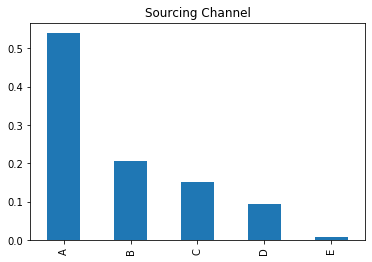

In [50]:
train['sourcing_channel'].value_counts(normalize=True).plot.bar(title = 'Sourcing Channel')

# residence_area_type column

In [51]:
train['residence_area_type'].value_counts(normalize=True)

Urban    0.603396
Rural    0.396604
Name: residence_area_type, dtype: float64

In [52]:
test['residence_area_type'].value_counts(normalize=True)

Urban    0.602151
Rural    0.397849
Name: residence_area_type, dtype: float64

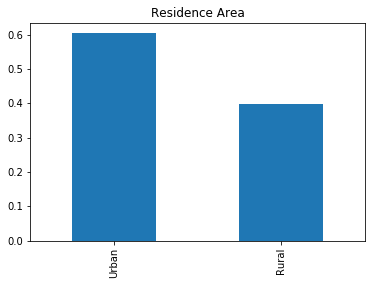

In [53]:
train['residence_area_type'].value_counts(normalize=True).plot.bar(title = 'Residence Area')

# Mapping Categorical Values

In [54]:
train["sourcing_channel"] = train["sourcing_channel"].map({'A':1,'B':2,'C':3,'D':4,'E':5})
train["residence_area_type"] = train["residence_area_type"].map({'Rural':1,'Urban':2})

In [55]:
test["sourcing_channel"] = test["sourcing_channel"].map({'A':1,'B':2,'C':3,'D':4,'E':5})
test["residence_area_type"] = test["residence_area_type"].map({'Rural':1,'Urban':2})

# Bivariate Analysis

In [56]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_years', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

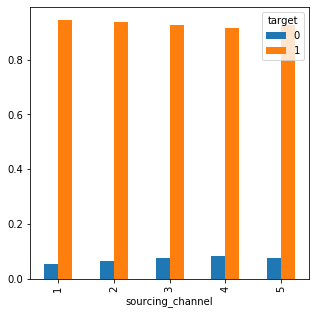

In [57]:
Sourcing_Channel = pd.crosstab(train['sourcing_channel'], train['target'])
Sourcing_Channel.div(Sourcing_Channel.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,5))
plt.show()

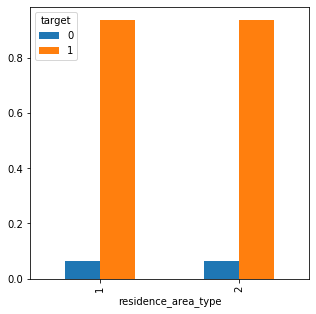

target,0,1
residence_area_type,,
1,1998,29672
2,3000,45183


In [58]:
Residence = pd.crosstab(train['residence_area_type'], train['target'])
Residence.div(Residence.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(5,5))
plt.show()
Residence

In [59]:
train['Income'].min(), train['Income'].max(), train['Income'].head()

(24030, 90262600, 0    355060
 1    315150
 2     84140
 3    250510
 4    198680
 Name: Income, dtype: int64)

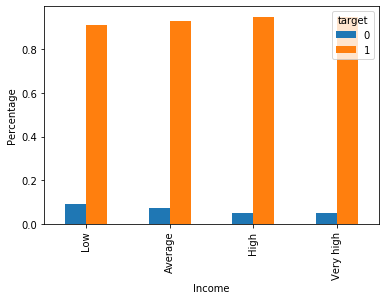

In [60]:
bins = [24000, 100000, 150000,500000, 90262600] 
group = ['Low','Average','High', 'Very high'] 
train['Income_bin'] = pd.cut(train['Income'],bins,labels=group)
Income_bin = pd.crosstab(train['Income_bin'],train['target'])

Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar") 
plt.xlabel('Income') 
P = plt.ylabel('Percentage')

In [61]:
del train['Income_bin']

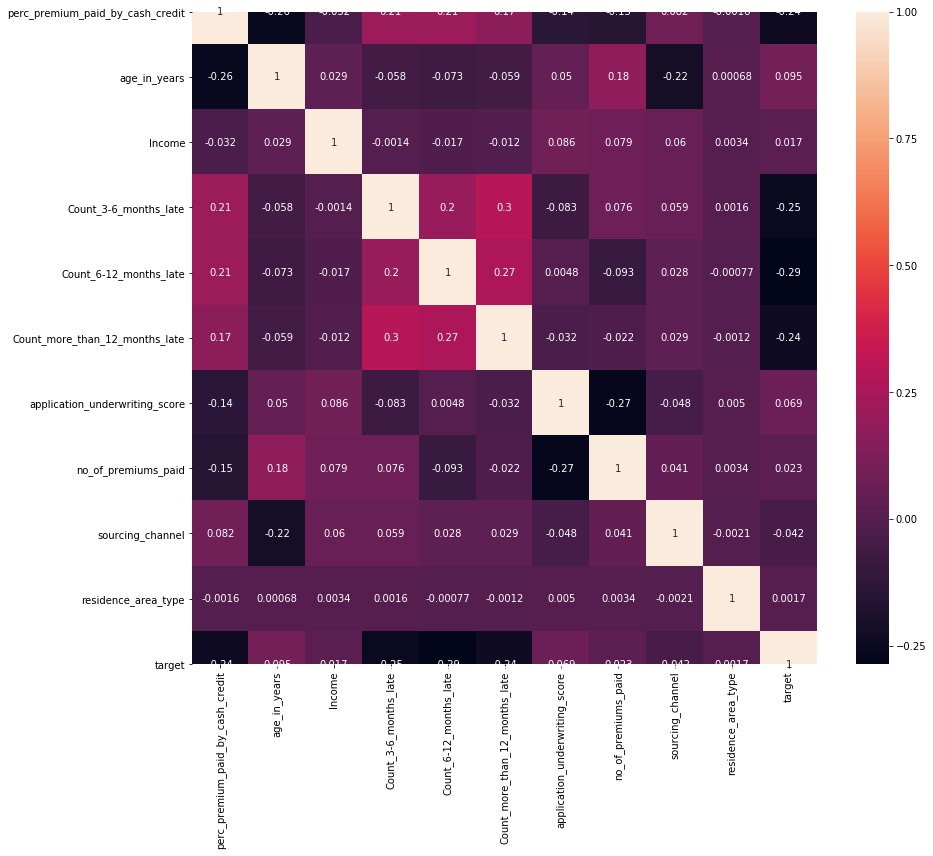

In [62]:
plt.figure(figsize=(14,12))
sns.heatmap(train.drop('id',axis=1).corr(), annot=True)

In [63]:
train[["target","residence_area_type"]].groupby(["residence_area_type"]).mean()

,target
residence_area_type,
1,0.936912
2,0.937737


In [64]:
train[["target","sourcing_channel"]].groupby(["sourcing_channel"]).mean()

,target
sourcing_channel,
1,0.945542
2,0.935441
3,0.924994
4,0.916126
5,0.924466


# Missing Impuatation and Outliers Treatment

In [65]:
train.isnull().sum()

id                                     0
perc_premium_paid_by_cash_credit       0
age_in_years                           0
Income                                 0
Count_3-6_months_late                 97
Count_6-12_months_late                97
Count_more_than_12_months_late        97
application_underwriting_score      2974
no_of_premiums_paid                    0
sourcing_channel                       0
residence_area_type                    0
target                                 0
dtype: int64

    Income Column Normalization for bigger numbers

In [66]:
train['Income'] = train['Income'].apply(np.log).round(2)
test['Income'] = test['Income'].apply(np.log).round(2)

In [67]:
train['application_underwriting_score'].fillna(train['application_underwriting_score'].mode()[0],inplace=True)
test['application_underwriting_score'].fillna(train['application_underwriting_score'].mode()[0],inplace=True)

In [68]:
#train.fillna(0,inplace=True)
#test.fillna(0,inplace=True)

# Standard Scaler Preprocessing

In [69]:
train.columns

Index(['id', 'perc_premium_paid_by_cash_credit', 'age_in_years', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type',
       'target'],
      dtype='object')

In [70]:
cols_for_ss = ['perc_premium_paid_by_cash_credit', 'age_in_years', 'Income',
       'Count_3-6_months_late', 'Count_6-12_months_late',
       'Count_more_than_12_months_late', 'application_underwriting_score',
       'no_of_premiums_paid', 'sourcing_channel', 'residence_area_type']

scaler = preprocessing.StandardScaler().fit(train[cols_for_ss])
train[cols_for_ss] = scaler.transform(train[cols_for_ss])
test[cols_for_ss] = scaler.transform(test[cols_for_ss])
print(scaler.mean_)

[3.14287741e-01 5.16074036e+01 1.20037694e+01 2.48670946e-01
 7.81884748e-02 6.00080245e-02 9.90979317e+01 1.08638874e+01
 1.82279939e+00 1.60339624e+00]


In [71]:
train.head()

,id,perc_premium_paid_by_cash_credit,age_in_years,Income,Count_3-6_months_late,Count_6-12_months_late,Count_more_than_12_months_late,application_underwriting_score,no_of_premiums_paid,sourcing_channel,residence_area_type,target
0,110936,0.342514,-1.303917,1.175234,-0.359630,-0.179124,-0.192321,-0.104970,0.413122,1.118955,0.810732,1
1,41492,-0.908559,0.518037,0.993551,-0.359630,-0.179124,-0.192321,1.066879,1.960315,-0.782089,0.810732,1
2,31300,1.799611,-0.252789,-1.004965,2.532785,6.693654,3.012594,-0.549465,-0.747272,1.118955,-1.233454,0
3,19415,-0.792111,-0.673240,0.645325,-0.359630,-0.179124,-0.192321,0.635854,-0.360474,-0.782089,0.810732,1
4,99379,-0.783153,2.410066,0.297098,-0.359630,-0.179124,-0.192321,1.039940,0.219723,0.168433,0.810732,1


# Build Training and Testing Model

In [72]:
X = train.drop(['id','target'],axis=1)
y = train_original.target

In [73]:
x_test = test.drop('id',axis=1)

In [74]:
x_train, x_valid, y_train, y_valid = train_test_split(X, y, train_size=0.95, test_size=0.05,shuffle=False)

In [75]:
x_test.shape, x_train.shape,test.shape, train.shape

((34224, 10), (75860, 10), (34224, 11), (79853, 12))

In [76]:
gbr = XGBClassifier(missing=np.nan, 
                    learning_rate = 0.15, 
                    gamma=1, 
                    colsample_bytree=0.8)

In [77]:
gbr.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.8, gamma=1,
       learning_rate=0.15, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [78]:
pred_cv = gbr.predict(x_valid)

In [79]:
roc_auc_score(y_valid, pred_cv)

0.5524230475992836

In [80]:
predict_target_proba = gbr.predict_proba(x_test)
predict_target = gbr.predict(x_test)
print(gbr.score(x_test, predict_target),gbr.score(x_train, y_train), gbr.score(x_valid,y_valid))

csv = pd.DataFrame()
csv['id'] = test['id']
csv['target'] = predict_target_proba[:,1]
csv.to_csv('sample.csv', header=True, index=False)

1.0 0.9415765884524123 0.9423991985975457


In [81]:
predict_target_proba[:,1]

array([0.99331397, 0.9854467 , 0.8768563 , ..., 0.9556917 , 0.7389428 ,
       0.9554207 ], dtype=float32)